
# Project: Bay Wheels Data Visualization


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#motivation">Motivation</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#univar">Univariate Exploration</a></li>
<li><a href="#bivar">Bivariate Exploration</a></li>
<li><a href="#multivar">Multivariate Exploration</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Bay Wheels** or formerly know as Ford GoBike is the Bay Area's bike share system. Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. 

Bay Wheels, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

<a id='motivation'></a>
## Motivation
The main features in collected data related to the start and end of a bike ride trip. This can be used to calculate when bikes are in high or low demand. There is also ample data related to the users of the bike service like whether they are a paying member or a casual user, bike sharing, and rental access method preferences.. These features can be used to make business decisions to enhance their services provided and improve overall user experiences.

<a id='wrangling'></a>
## Data Wrangling
There are three parts in data wrangling which are <a href='#gather'>gather</a>, <a href='#access'>access</a>, and <a href='#clean'>clean</a>.

<a id='gather'></a>
### i. Gather Data
The data is download from [Lyft](https://www.lyft.com/bikes/bay-wheels/system-data) which provides Bay Wheels's trip data for public use. The dataset is avaible from 2017 to March 2020. In this project, the trip data in 2019 will be used only.

In [583]:
# Import library
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
%matplotlib inline

In [147]:
# Import dataset
path = r'C:\Users\FORGE-15 I7\OneDrive - AsiaPay Limited\Udacity\Data_Visualization\Project Communicate_Data_Findings\dataset'
files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f, dtype={"bike_share_for_all_trip":object, "rental_access_method":object}) for f in files), ignore_index = True)

In [148]:
# Save dataset into csv
df.to_csv('dataset/clean_data/baywheels_2019.csv', index = False)

<a id='access'></a>
### ii. Access Data

In [149]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [427]:
df.shape

(2506983, 15)

In [428]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2506983 non-null  int64  
 1   start_time               2506983 non-null  object 
 2   end_time                 2506983 non-null  object 
 3   start_station_id         2426249 non-null  float64
 4   start_station_name       2426850 non-null  object 
 5   start_station_latitude   2506983 non-null  float64
 6   start_station_longitude  2506983 non-null  float64
 7   end_station_id           2424081 non-null  float64
 8   end_station_name         2424633 non-null  object 
 9   end_station_latitude     2506983 non-null  float64
 10  end_station_longitude    2506983 non-null  float64
 11  bike_id                  2506983 non-null  int64  
 12  user_type                2506983 non-null  object 
 13  bike_share_for_all_trip  2263724 non-null 

In [152]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [153]:
# Check missing value
df.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [154]:
# Check duplicated value
df.duplicated().sum()

0

<a id='clean'></a>
### iii. Data Cleaning
Before assessing the data to draw conclusions, there are some quality issues (this dataset is tidy) that need to be cleaned (from left to right):
- Missing values handling
- Change `bike_id`, `start_station_id` and `end_station_id` to object dtype (string)
- Change `user_type`, `bike_share_for_all_trip`, and `rental_access_method` to category dtype
- Change `start_time`, and `end_time` to datetime dtype
- Add another column `duration_min` to display duration of trips in minutes
- Add another column `distance_miles` to display distance for each trip
- Add columns `start_time_month`, `start_time_weekday`, and `start_time_hour` to for better usage in data visualization later

In [155]:
# Create a copy of dataset
df_clean = df.copy()

#### Define 1: Missing values handling

All the missing values are found in object dtype columns which should not be replaced by any other values randomly. We cannot drop these missing value rows too since the portion is large enough to affect our finding later. This, there will be no action taken to deal with missing values.

#### Define 2: Change `bike_id`, `start_station_id` and `end_station_id` to object dtype (string)

Convert the id columns'data type from a float or int to a string using `astype`, remove the '.0' using string slicing, and pad with a leading 0.

#### Code 2

In [156]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.nanmax.html
cols = ['bike_id', 'start_station_id', 'end_station_id']
for c in cols:
    print(c + "_min = {}, ".format(np.nanmin(df_clean[c])) + c + "_max = {}".format(np.nanmax(df_clean[c])))

bike_id_min = 4, bike_id_max = 999941
start_station_id_min = 3.0, start_station_id_max = 498.0
end_station_id_min = 3.0, end_station_id_max = 498.0


From above, we can see that there will be 6 digits for bike ID and 3 digits for both start and end station ID.

In [157]:
# Change float, int to object
cols = ['bike_id', 'start_station_id', 'end_station_id']
for c in cols:
    df_clean[c] =  df_clean[c].astype(str).str[:-2]

In [158]:
# Bike ID
df_clean['bike_id'] = df_clean['bike_id'].str.pad(width=6, side='left', fillchar='0')
df_clean['bike_id'].replace('00000n', np.nan, inplace=True)

In [159]:
# Start and end station ID
cols = ['start_station_id', 'end_station_id']
for c in cols:
    df_clean[c] =  df_clean[c].astype(str).str.pad(width=3, side='left', fillchar='0')
    df_clean[c].replace('00n', np.nan, inplace=True)

#### Test 2

In [160]:
df_clean[['bike_id', 'start_station_id', 'end_station_id']].sample(10)

,bike_id,start_station_id,end_station_id
827056,000056,181,222
980916,000023,125,125
497458,000062,349,107
652840,000005,080,050
850793,000010,177,176
2296642,000122,058,026
919298,000029,259,270
921977,000005,023,021
1781525,000005,252,245
252823,000052,108,129


#### Define 3: Change `user_type`, `bike_share_for_all_trip`, and `rental_access_method` to category dtype

#### Code 3

In [161]:
# Print all avaiable classes in columns
cols = ['user_type', 'bike_share_for_all_trip', 'rental_access_method']
for c in cols:
    print(c)
    print(df_clean[c].value_counts())

user_type
Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64
bike_share_for_all_trip
No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64
rental_access_method
app        108010
clipper     12828
Name: rental_access_method, dtype: int64


In [162]:
# Change object to category dtype
user_classes = ['Subscriber', 'Customer']
userCls = pd.api.types.CategoricalDtype(ordered = True, categories = user_classes)
df_clean['user_type'] = df_clean['user_type'].astype(userCls)

bike_share_classes = ['Yes', 'No']
bikeCls = pd.api.types.CategoricalDtype(ordered = True, categories = bike_share_classes)
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype(bikeCls)

rental_access_method_classes = ['app', 'clipper']
rentalCls = pd.api.types.CategoricalDtype(ordered = True, categories = rental_access_method_classes)
df_clean['rental_access_method'] = df_clean['rental_access_method'].astype(rentalCls)      

#### Test 3

In [163]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   duration_sec             int64   
 1   start_time               object  
 2   end_time                 object  
 3   start_station_id         object  
 4   start_station_name       object  
 5   start_station_latitude   float64 
 6   start_station_longitude  float64 
 7   end_station_id           object  
 8   end_station_name         object  
 9   end_station_latitude     float64 
 10  end_station_longitude    float64 
 11  bike_id                  object  
 12  user_type                category
 13  bike_share_for_all_trip  category
 14  rental_access_method     category
dtypes: category(3), float64(4), int64(1), object(7)
memory usage: 236.7+ MB


#### Define 4: Change `start_time`, and `end_time` to datetime dtype

#### Code 4

In [164]:
# Change object to datetime
cols = ['start_time', 'end_time']
for c in cols:
    df_clean[c] = pd.to_datetime(df_clean[c]) 

#### Test 4

In [165]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
dtypes: category(3), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 236.7+ MB


#### Define 5: Add another column `duration_min` to display duration of trips in minutes
Add columns for the start month, day of the week, and hour, along with figuring out the trip duration in minutes so I can create visuals based on workable unit.

#### Code 5

In [166]:
# Duration in seconds to duration in minutes and limit of 1 decimal place
df_clean['duration_min'] = df_clean['duration_sec'].apply(lambda x: "{:.1f}".format(x/60))
df_clean['duration_min'] = df_clean['duration_min'].astype(float)
#df_clean['duration_min'] = df_clean['duration_sec'].apply(lambda x: x/60)
#df_clean['duration_min'] = df_clean['duration_min'].astype(float).round(1)

#### Test 5

In [167]:
df_clean['duration_min'].sample(10)

1360348     7.0
1369523    19.4
1815029     7.5
2488649    46.0
1393079     8.5
1730531     3.1
1736364    16.2
635698      3.1
2170733     8.3
1132882     6.4
Name: duration_min, dtype: float64

#### Define 6: Add another column `distance_miles` to display distance for each trip
Calculate distance between start station and end station based on latitude and longitude. 

#### Code 6

In [168]:
from math import radians, cos, sin, asin, sqrt, atan2

# Define haversine function to calculate distance
def haversine(origin, destination):
       
    lat1, long1 = origin
    lat2, long2 = destination
    
    radius = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
 
    dLat = radians(lat2 - lat1)
    dLong = radians(long2 - long1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    a = (sin(dLat / 2) * sin(dLat / 2) + cos(lat1) * cos(lat2) * sin(dLong / 2) * sin(dLong / 2))
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    d = radius * c

    return d

In [169]:
# Apply defined formula to calculate distance
df_clean['distance_miles'] = df_clean.apply(lambda x: haversine((x['start_station_latitude'], x['start_station_longitude']), 
                                                                (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

#### Test 6

In [170]:
df_clean.distance_miles.describe()

count    2.506983e+06
mean     1.347496e+00
std      4.817019e+01
min      0.000000e+00
25%      5.768482e-01
50%      9.034874e-01
75%      1.390381e+00
max      7.955629e+03
Name: distance_miles, dtype: float64

#### Define 7: Add columns start_time_month, start_time_weekday, and start_time_hour to for better usage in data visualization later
Add columns for the start month, day of the week, and hour, along with figuring out the trip duration in minutes so I can create visuals based on workable unit.

#### Code 7

Refers [*strftime*](https://strftime.org/) to extract date features from datetime or [*dt.month*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.month.html) to extract month from datetime

In [171]:
# Start time month (January - September)
df_clean['start_time_month'] = df_clean.start_time.dt.strftime('%B')

In [172]:
# Start time weekday (Monday - Sunday)
df_clean['start_time_weekday'] = df_clean['start_time'].dt.strftime('%A')

In [173]:
# Start time weekday (00 - 23)
#df_clean['start_time_hour'] = df_clean['start_time'].dt.hour
df_clean['start_time_hour'] = df_clean['start_time'].dt.strftime('%H')

#### Test 7

In [174]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 20 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     category      
 15  duration_min             float64       
 16  distance_miles           float64       
 17  start_time_month         ob

In [175]:
df_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_min,distance_miles,start_time_month,start_time_weekday,start_time_hour
1345587,550,2019-07-13 08:06:48.863,2019-07-13 08:15:59.296,095,Sanchez St at 15th St,37.766219,-122.431060,285,Webster St at O'Farrell St,37.783521,-122.431158,000019,Subscriber,No,NaN,9.2,1.195826,July,Saturday,08
2324020,240,2019-11-05 17:02:23.357,2019-11-05 17:06:24.207,044,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,058,Market St at 10th St,37.776619,-122.417385,000118,Subscriber,Yes,NaN,4.0,0.435816,November,Tuesday,17
2352033,468,2019-11-01 12:35:18.977,2019-11-01 12:43:07.436,003,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,058,Market St at 10th St,37.776619,-122.417385,000103,Subscriber,No,NaN,7.8,0.958865,November,Friday,12
968889,2626,2019-05-14 12:57:20.731,2019-05-14 13:41:07.381,006,The Embarcadero at Sansome St,37.804770,-122.403234,371,Lombard St at Columbus Ave,37.802746,-122.413579,000006,Customer,No,NaN,43.8,0.581950,May,Tuesday,12
2039474,754,2019-10-17 17:29:46.119,2019-10-17 17:42:20.331,022,Howard St at Beale St,37.789756,-122.394643,013,Commercial St at Montgomery St,37.794231,-122.402923,000111,Subscriber,No,NaN,12.6,0.547865,October,Thursday,17
1154834,334,2019-06-14 09:07:54.743,2019-06-14 09:13:29.624,200,2nd Ave at E 18th St,37.800214,-122.253810,201,10th St at Fallon St,37.797673,-122.262997,000017,Subscriber,No,NaN,5.6,0.531558,June,Friday,09
806414,123,2019-04-08 06:39:55.999,2019-04-08 06:41:59.680,100,Bryant St at 15th St,37.767100,-122.410662,112,Harrison St at 17th St,37.763847,-122.413004,000063,Subscriber,No,NaN,2.0,0.258694,April,Monday,06
2463928,732,2019-12-04 16:25:19.782,2019-12-04 16:37:32.190,419,Fern St at Polk St,37.788197,-122.420373,091,Berry St at King St,37.771762,-122.398438,000123,Subscriber,NaN,NaN,12.2,1.651013,December,Wednesday,16
1984556,843,2019-10-24 18:20:12.821,2019-10-24 18:34:16.618,384,Jackson St at Polk St,37.794160,-122.421568,350,8th St at Brannan St,37.771431,-122.405787,000116,Subscriber,No,NaN,14.1,1.791831,October,Thursday,18
1004108,607,2019-05-08 17:13:37.470,2019-05-08 17:23:45.210,014,Clay St at Battery St,37.795001,-122.399970,371,Lombard St at Columbus Ave,37.802746,-122.413579,000004,Subscriber,No,NaN,10.1,0.915886,May,Wednesday,17


##### Drop Unused Columns

In [176]:
col_drop = ['duration_sec', 'start_time', 'end_time', 'start_station_latitude',
            'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
df_clean.drop(col_drop, axis = 1, inplace = True)

In [177]:
df_clean.sample(10)

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_min,distance_miles,start_time_month,start_time_weekday,start_time_hour
135196,050,2nd St at Townsend St,015,San Francisco Ferry Building (Harry Bridges Pl...,000055,Subscriber,No,NaN,5.9,1.049447,January,Friday,17
593435,058,Market St at 10th St,285,Webster St at O'Farrell St,000048,Subscriber,No,NaN,9.1,0.890810,March,Wednesday,19
2081231,453,Brannan St at 4th St,005,Powell St BART Station (Market St at 5th St),000121,Customer,No,NaN,21.9,0.750112,October,Friday,23
821116,244,Shattuck Ave at Hearst Ave,256,Hearst Ave at Euclid Ave,000061,Customer,No,NaN,3.4,0.444061,April,Friday,23
183864,314,Santa Clara St at Almaden Blvd,278,The Alameda at Bush St,000038,Subscriber,Yes,NaN,5.2,0.566868,January,Wednesday,23
731261,104,4th St at 16th St,104,4th St at 16th St,000027,Subscriber,No,NaN,17.3,0.000000,April,Monday,15
1299967,259,Addison St at Fourth St,259,Addison St at Fourth St,000019,Subscriber,No,NaN,48.2,0.000000,July,Sunday,12
30702,141,Valencia St at Cesar Chavez St,145,29th St at Church St,000053,Customer,No,NaN,4.0,0.467435,January,Monday,17
1117367,125,20th St at Bryant St,136,23rd St at San Bruno Ave,000007,Subscriber,No,NaN,5.7,0.445358,June,Thursday,13
193491,003,Powell St BART Station (Market St at 4th St),141,Valencia St at Cesar Chavez St,000044,Subscriber,No,NaN,18.8,2.781192,February,Thursday,19


##### Save cleaned dataset

In [178]:
df_clean.to_csv('dataset/clean_data/baywheels_2019_clean.csv', index = False)

<a id='univar'></a>
## Univariate Exploration

In [183]:
# Removing the rainbow colors and use only ONE color
base_color = sns.color_palette()[0]

In [180]:
# Set sns style
sns.set(style="darkgrid")

### Question 1
*Which month has the highest bike usage?*

####  Bay Wheels Usage by Month

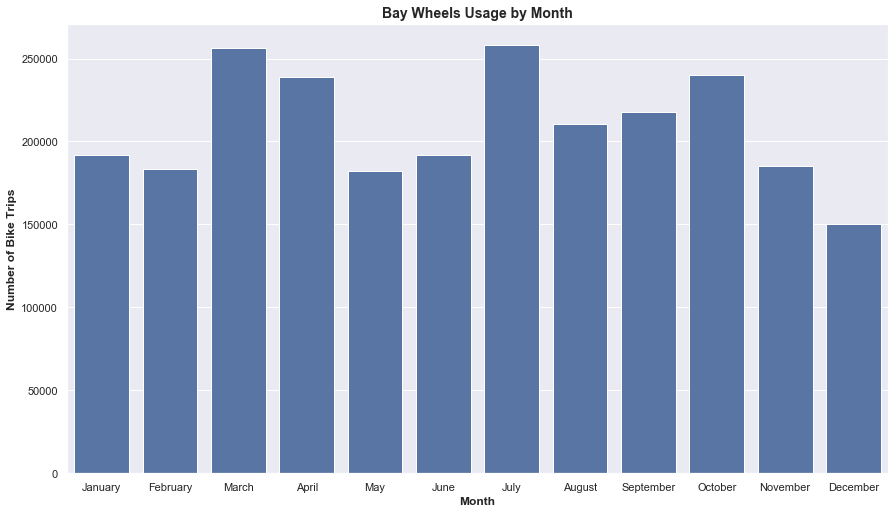

In [643]:
#.title() to make the first letter in each word upper case:
# Monthly usage of the Bay Wheels
plt.figure(figsize=[14.70, 8.27])
ax = sns.countplot(data = df_clean, 
                   x = 'start_time_month', 
                   color = base_color)
ax.set_title('Bay Wheels Usage by Month', fontdict = {'fontsize':14,  'fontweight':'bold'})
ax.set_xlabel('Month', fontsize = 12, weight = "bold")
ax.set_ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
#ax.set(xlabel='Month', ylabel='Number of Bike Trips', title='Bay Wheels Usage by Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0);

> The summer months and early-mid autumn are the most popular times to use the Bay Wheels sharing system. March and July are the most popular months, with April and October coming in closely as the third and forth most popular months to use the bike system. The weather in San Francisco is best in the mid-late summer and usually stays sunny until returning to its usual foggy weather in the late autumn/early winter months.

### Question 2
*Which day of week has the highest bike usage?*

#### Bay Wheels Usage by Day of Week

*Note: [AxesSubplot](https://matplotlib.org/api/axes_api.html) use set_xlabel*

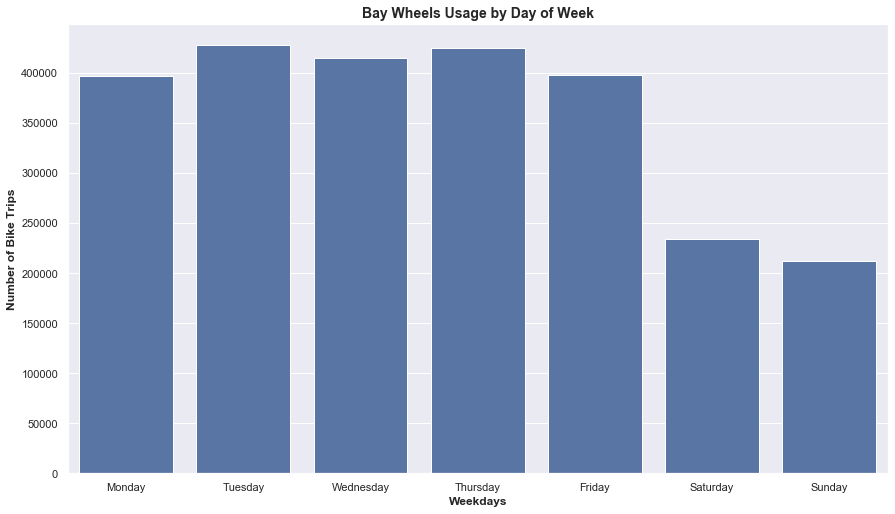

In [661]:
# Weekday usage of the Bay Wheels system
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[14.70, 8.27])
ax = sns.countplot(data = df_clean, 
                   x = 'start_time_weekday', 
                   color = base_color,
                   order = day_order)
ax.set_title('Bay Wheels Usage by Day of Week', fontdict = {'fontsize':14,  'fontweight':'bold'})
ax.set_xlabel('Weekdays', fontsize = 12, weight = "bold")
ax.set_ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
#ax.set(xlabel='Month', ylabel='Number of Bike Trips', title='Bay Wheels Usage by Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);

> Tuesdays seem to be the most popular day for using the bike sharing system, however the other weekdays  are very close to it. The usage drops significantly on weekend (Saturdays and Sundays) suggesting the Bay Wheels system is used primarily for commuting purposes during working days

### Question 3
*What time has the highest bike usage?*

#### Bay Wheels Usage by Hour

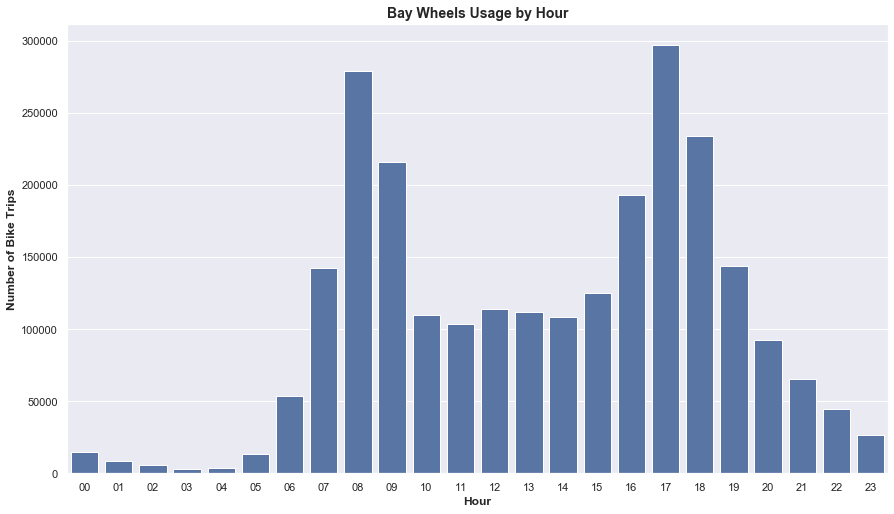

In [663]:
# Hour usage of the Bay Wheels
plt.figure(figsize=[14.70, 8.27])
ax = sns.countplot(data = df_clean, 
                   x = 'start_time_hour', 
                   color = base_color)
ax.set_title('Bay Wheels Usage by Hour', fontdict = {'fontsize':14,  'fontweight':'bold'})
ax.set_xlabel('Hour', fontsize = 12, weight = "bold")
ax.set_ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
ax.set_xticklabels(ax.get_xticklabels());

> The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm, which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuters

### Question 4
*Which start stations are the popular ?*

#### Most Common Start Station 

In [195]:
# Number of trips of each start station
station_trip = df_clean.groupby('start_station_id')['bike_id'].count().sort_values(ascending=False).reset_index()
station_trip.rename(columns={'bike_id':'num_of_trips'}, inplace=True)
station_trip

,start_station_id,num_of_trips
0,058,45058
1,081,42962
2,030,40302
3,015,39016
4,067,36576
...,...,...
431,429,4
432,329,3
433,444,3
434,484,2


*Note: [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) use set_xlabels*

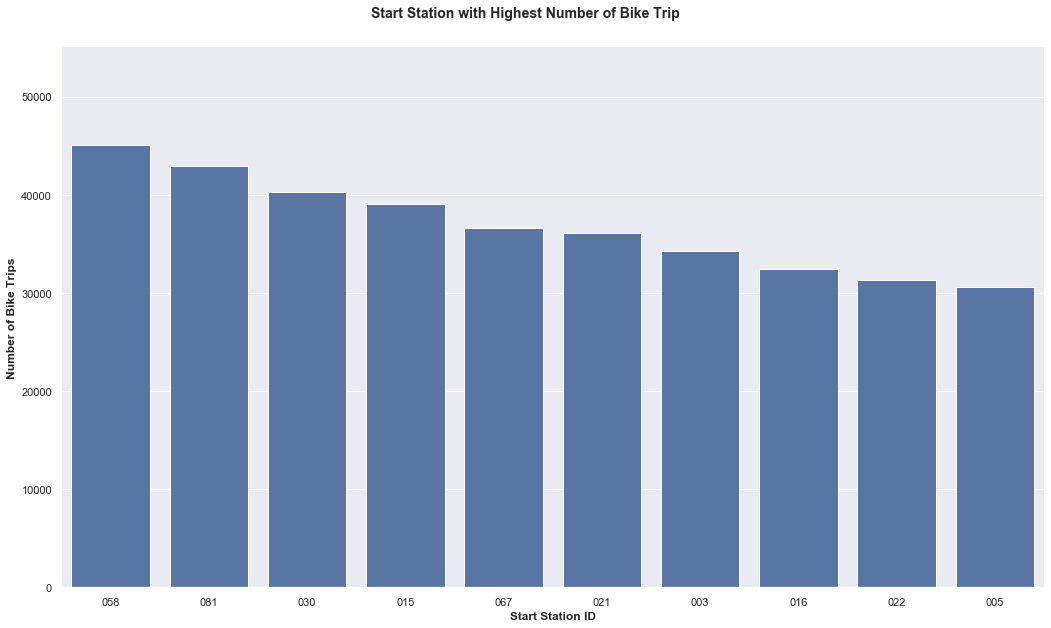

In [665]:
# Number of bike trips of start station
ax = sns.catplot(data = station_trip.head(10), 
                 x = 'start_station_id',
                 y = 'num_of_trips',
                 kind='bar',
                 color = base_color,
                 order = station_trip.head(10).start_station_id,
                 height = 8.27,  aspect = 14.70/8.27);
ax.set_xlabels(fontsize = 12, weight = "bold")
ax.set_ylabels(fontsize = 12, weight = "bold")
ax.set_axis_labels('Start Station ID', 'Number of Bike Trips')
ax.fig.suptitle('Start Station with Highest Number of Bike Trip', y=1.05, fontsize=14, fontweight='bold')
ax.set(ylim=(0, station_trip.head(10).num_of_trips.max() + 10000));

> Station 058 which is *Market St at 10th St* is the most common start station with the highest overall of bike trip in 2019.

### Question 5
*Which start stations are the least popular ?*

#### Least Common Start Station 

In [210]:
station_trip.tail(10).sort_values(by = 'num_of_trips')

,start_station_id,num_of_trips
435,420,1
434,484,2
432,329,3
433,444,3
431,429,4
430,428,5
429,065,6
428,272,7
426,498,11
427,449,11


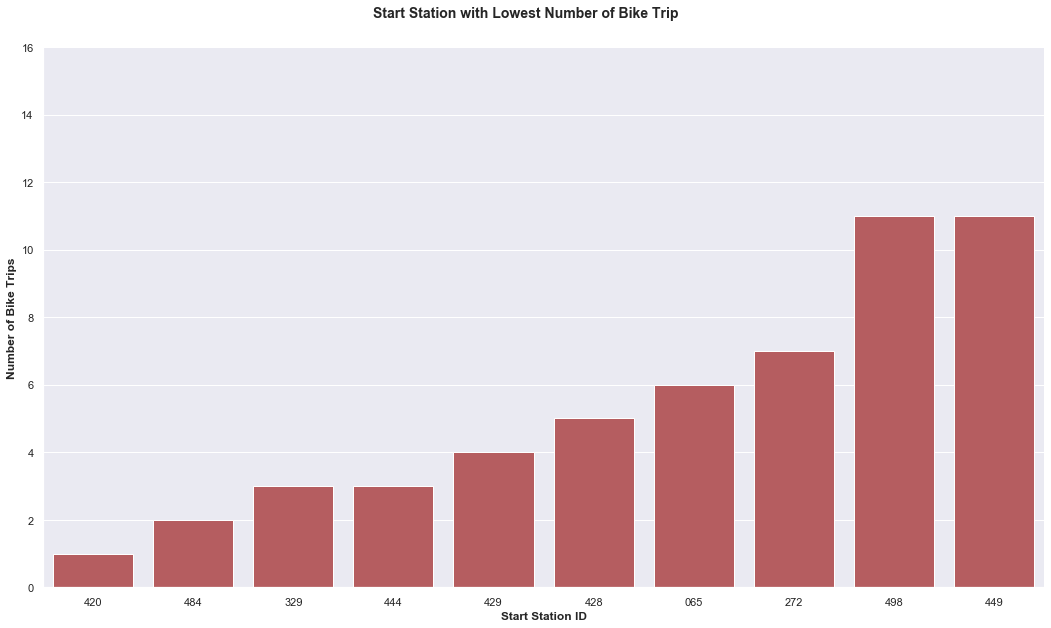

In [666]:
# Number of bike trips of start station
ax = sns.catplot(data = station_trip.tail(10), 
                 x = 'start_station_id',
                 y = 'num_of_trips',
                 kind='bar',
                 color = sns.color_palette()[3],
                 order = station_trip.tail(10).sort_values(by = 'num_of_trips').start_station_id,
                 height = 8.27,  aspect = 14.70/8.27);
ax.set_axis_labels('Start Station ID', 'Number of Bike Trips')
ax.set_xlabels(fontsize = 12, weight = "bold")
ax.set_ylabels(fontsize = 12, weight = "bold")
ax.fig.suptitle('Start Station with Lowest Number of Bike Trip', y=1.05, fontsize=14, fontweight='bold');
ax.set(ylim=(0, station_trip.tail(10).num_of_trips.max() + 5));

SF Test Station is the least common start station with only a ride trip in 2019.

### Question 6
*How long for users take the bike ?*

#### Bay Wheels Trip Duration

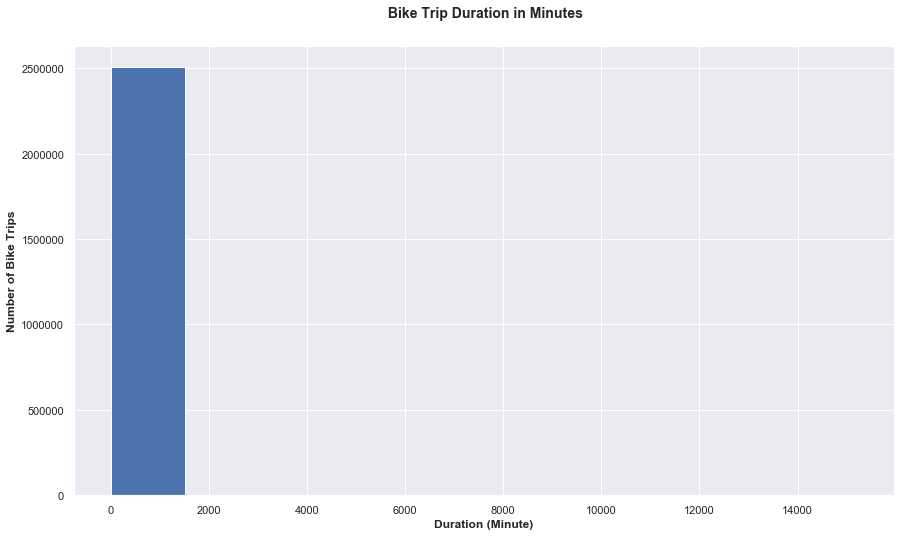

In [668]:
# Duration of the bike rides in MINUTES
plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df_clean, x = 'duration_min');
plt.title(" Bike Trip Duration in Minutes", y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Duration (Minute)', fontsize = 12, weight = "bold")
plt.ylabel('Number of Bike Trips', fontsize = 12, weight = "bold");

In [40]:
df_clean['duration_min'].describe()

count    2.506983e+06
mean     1.346090e+01
std      3.291190e+01
min      1.000000e+00
25%      6.000000e+00
50%      9.500000e+00
75%      1.480000e+01
max      1.520180e+04
Name: duration_min, dtype: float64

In [41]:
df_clean['duration_min'].value_counts().sort_index(ascending=False)

15201.8       1
1437.2        1
1437.0        1
1435.2        2
1432.5        1
           ... 
1.4        3241
1.3        2075
1.2        2153
1.1        2195
1.0         627
Name: duration_min, Length: 5704, dtype: int64

In [42]:
df_clean.duration_min.describe(percentiles = [.99])

count    2.506983e+06
mean     1.346090e+01
std      3.291190e+01
min      1.000000e+00
50%      9.500000e+00
99%      6.880000e+01
max      1.520180e+04
Name: duration_min, dtype: float64

From the figure and observation above, we can see that there is an extreme outlier which affect the whole structure of distribution of trip duration. Thus, we will set the axis limit and ignore the outlier.

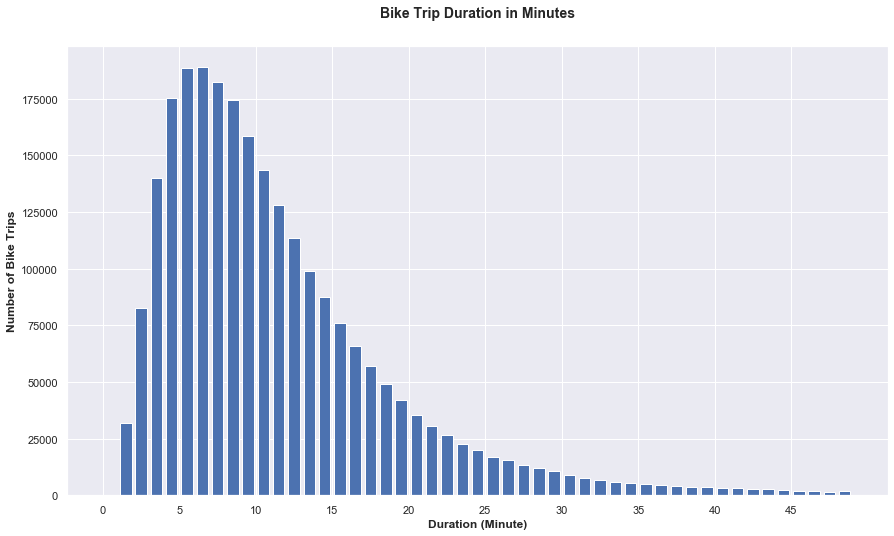

In [669]:
# Duration of the bike rides in MINUTES
bin_edges = np.arange(0, 50, 1)
ticks = np.arange(0, 50, 5).tolist()
labels = ['{}'.format(val) for val in ticks]
plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df_clean, x = 'duration_min', bins = bin_edges, rwidth = 0.75);
plt.title("Bike Trip Duration in Minutes", y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Duration (Minute)', fontsize = 12, weight = "bold")
plt.ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
plt.xticks(ticks, labels);

> The distribution of trip duration is right skewed with an average 13 minutes of ride. This suggests riders are taking the bikes for short distances 

### Question 7
*What is the portion of Subscriber among the users ?*

#### Bay Wheels Users Distribution

In [220]:
user = df_clean.user_type.value_counts()
user

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

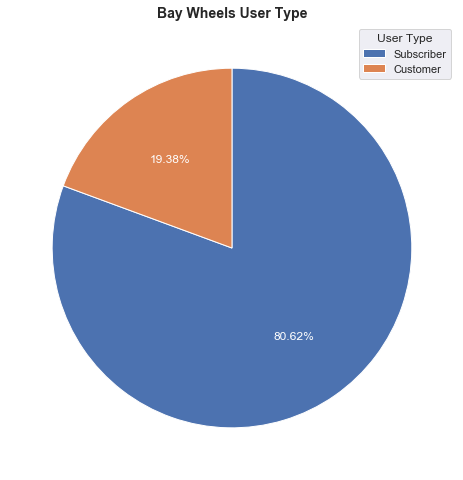

In [471]:
# Pie to show distribution
plt.figure(figsize=[14.70, 8.27])
plt.pie(user, labels = user.index, startangle = 90, autopct= '%1.2f%%', counterclock = False, textprops={'color':'white'});
plt.legend(user.index, 
           title='User Type', 
           loc='upper right')
plt.title('Bay Wheels User Type', fontsize=14,  fontweight='bold');

> More than 80% of Bay Wheels users are Subscriber.

### Question 11
*Does users prefer to share bike with other?*

#### Bike Sharing Preferences

In [223]:
bike_share = df_clean.bike_share_for_all_trip.value_counts()
bike_share

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

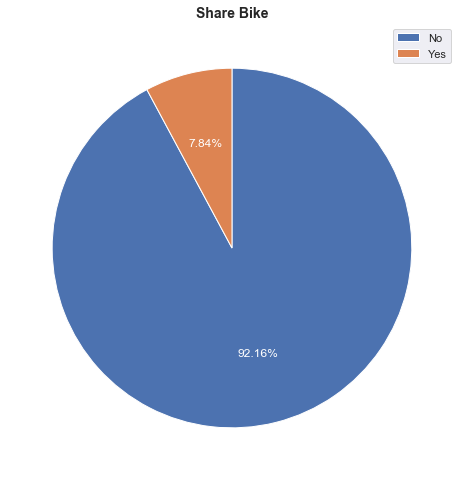

In [472]:
# Pie to show distribution
plt.figure(figsize=[14.70, 8.27])
plt.pie(bike_share, labels = bike_share.index, startangle = 90, autopct= '%1.2f%%', counterclock = False, textprops={'color':'white'});
plt.legend(bike_share.index, 
           loc='upper right')
plt.title('Share Bike', fontsize=14,  fontweight='bold');

Most of the users choose to take the bike personally rather than sharing.

### Question 12
*How users rent a bike or use Bike Wheels ?*

#### Rental Access Method

In [226]:
rental = df_clean.rental_access_method.value_counts()
rental

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

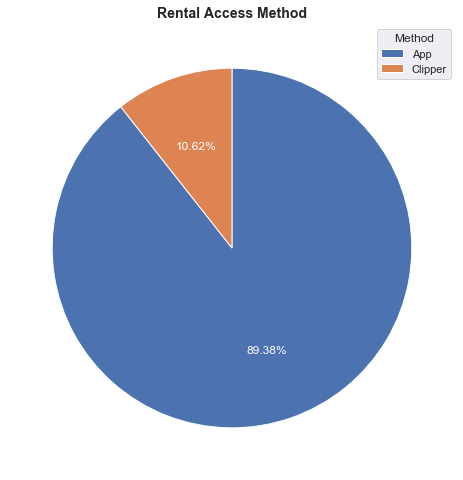

In [473]:
# Pie to show distribution
plt.figure(figsize=[14.70, 8.27])
plt.pie(rental, labels = rental.index, startangle = 90, autopct= '%1.2f%%', counterclock = False, textprops={'color':'white'});
plt.legend(['App', 'Clipper'], #rental.index
           title='Method', 
           loc='upper right')
plt.title('Rental Access Method', fontsize=14,  fontweight='bold');

> Majority of Bay Wheels users tend to user app to rent a bike.

<a id='bivar'></a>
## Bivariate Exploration

### Question 13
*Which month has the highest bike usage among Subscribers and Customers ?*

#### Bay Wheels Montly Usage by User Type

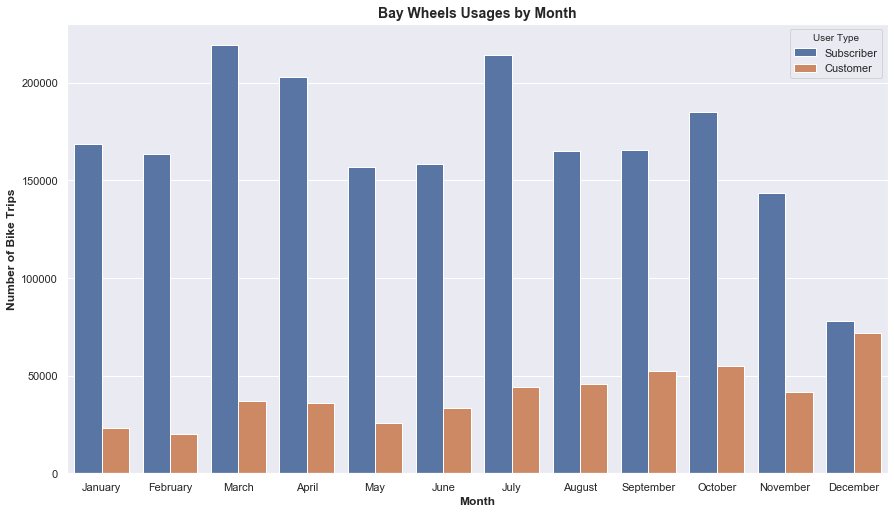

In [679]:
# Monthly usage of the Bay Wheels by each user type
plt.figure(figsize=[14.70, 8.27])
ax = sns.countplot(data = df_clean, 
                   x = 'start_time_month', 
                   hue='user_type')
ax.set_title('Bay Wheels Usages by Month', fontdict = {'fontsize':14,  'fontweight':'bold'})
ax.set_xlabel('Month', fontsize = 12, weight = "bold")
ax.set_ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
#ax.set(xlabel='Month', ylabel='Number of Bike Trips', title='Bay Wheels Usage by Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title='User Type');

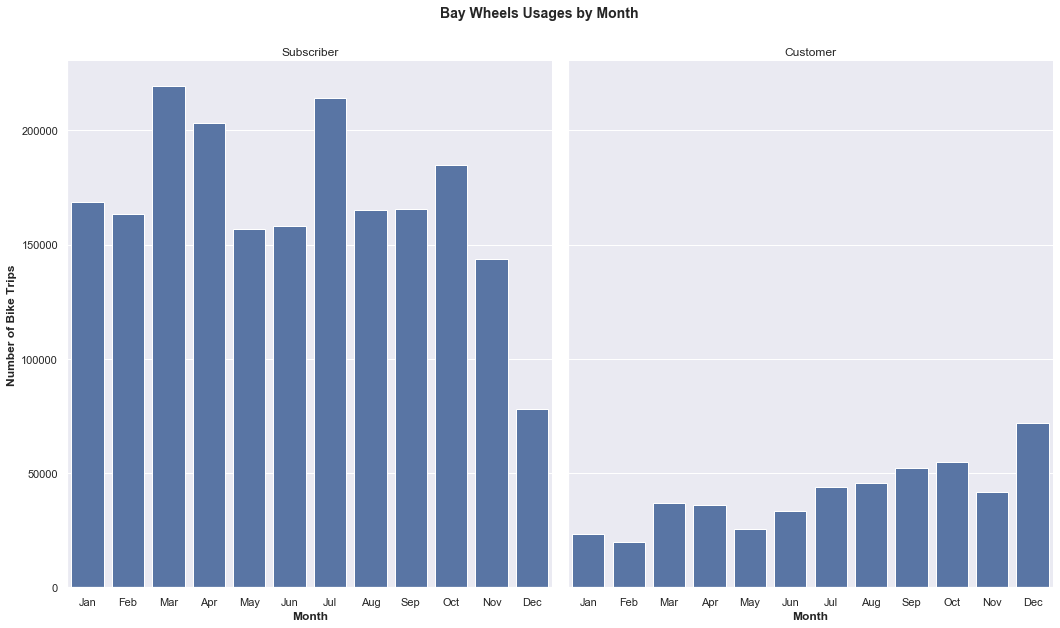

In [678]:
# Alternative way
month_abbv = []
for i in df_clean.start_time_month.unique():
    month_abbv.append(datetime.datetime.strptime(i,'%B').strftime('%b'))
    
g = sns.catplot(data = df_clean, 
                x = 'start_time_month', 
                col = 'user_type',
                kind = 'count',
                color = base_color,
                sharey = True,
                height = 8.27,  aspect = (14.70/2)/(8.27));
g.set_axis_labels("Month", "Number of Bike Trips");
g.set_titles("{col_name}");
g.set(xticklabels=month_abbv)
g.fig.suptitle('Bay Wheels Usages by Month', y=1.05, fontsize=14, fontweight='bold')
g.set_xlabels(fontsize = 12, weight = "bold")
g.set_ylabels(fontsize = 12, weight = "bold")
g.set_xticklabels(rotation=0);

C:\Users\FORGE-15 I7\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


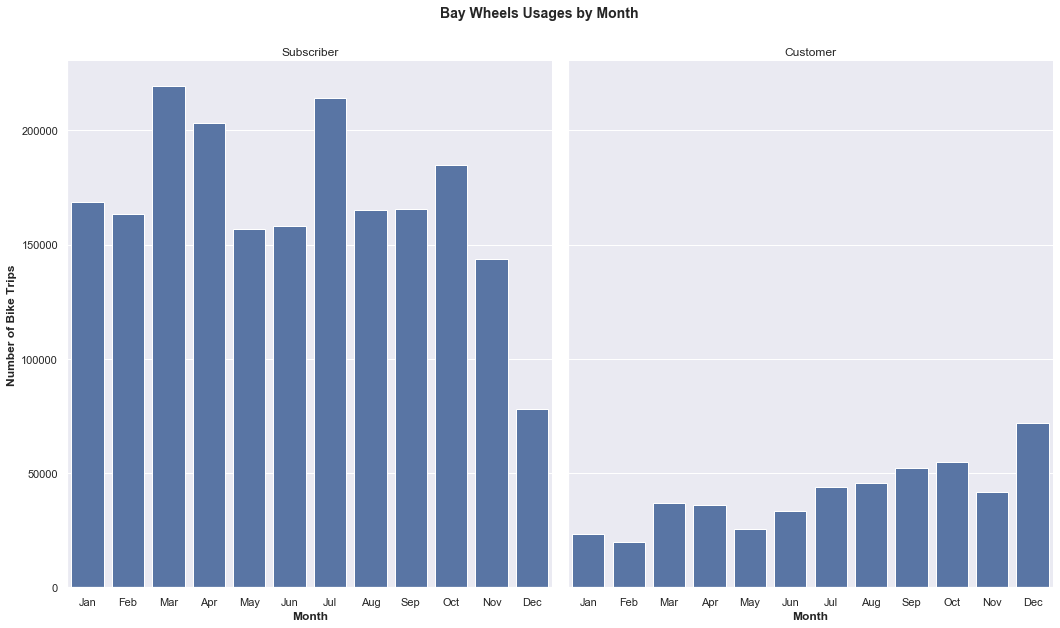

In [677]:
# Alternative way
g = sns.FacetGrid(data = df_clean, col = 'user_type', 
                  col_wrap = 2,
                  height = 8.27,  aspect = (14.70/2)/(8.27))
g.map(sns.countplot, 'start_time_month')
g.set_ylabels('Number of Bike Trips', fontsize = 12, weight = "bold")
g.set_xlabels('Month', fontsize = 12, weight = "bold")
g.set_titles('{col_name}');
g.set(xticklabels=month_abbv)
g.fig.suptitle('Bay Wheels Usages by Month', y=1.05, fontsize=14, fontweight='bold');
g.set_xticklabels(rotation=0);

> Subscribers always have a relatively high usage of Bay Wheels service compared to customers in almost every month except December which difference  is not significant.

### Question 14
*Which day of week has the highest bike usage among Subscribers and Customers ?*

#### Bay Wheels Weekly Usage by User Type

In [422]:
df_clean_user_week = df_clean.groupby(['start_time_weekday', 'user_type']).size().reset_index()
df_clean_user_week.rename(columns={0:'num_of_trips'}, inplace=True)
df_clean_user_week

,start_time_weekday,user_type,num_of_trips
0,Monday,Subscriber,329934
1,Monday,Customer,66529
2,Tuesday,Subscriber,358592
3,Tuesday,Customer,69048
4,Wednesday,Subscriber,347993
5,Wednesday,Customer,66455
6,Thursday,Subscriber,354081
7,Thursday,Customer,70393
8,Friday,Subscriber,321340
9,Friday,Customer,75944


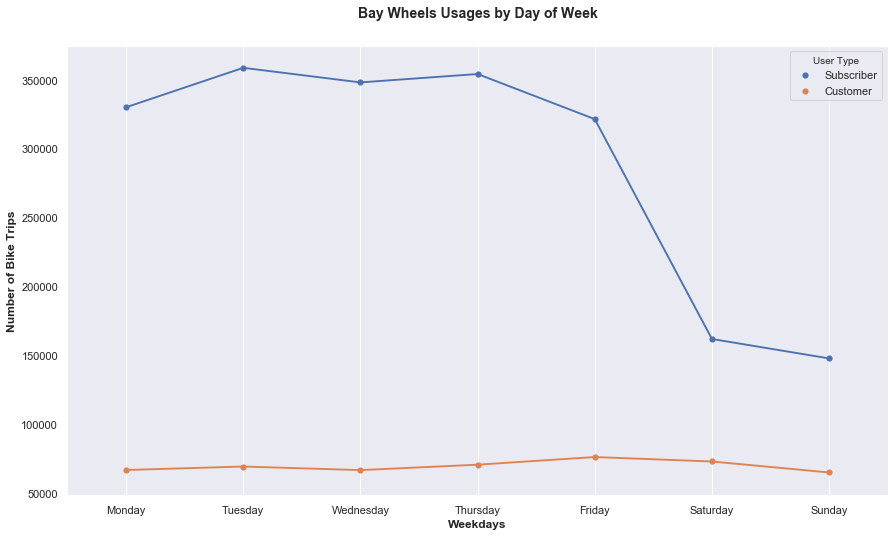

In [676]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[14.70, 8.27])
ax = sns.pointplot(data = df_clean_user_week, 
                   x = 'start_time_weekday',
                   y = 'num_of_trips', 
                   hue = 'user_type', 
                   scale=.7, 
                   order = day_order);
plt.title('Bay Wheels Usages by Day of Week', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Weekdays', fontsize = 12, weight = "bold")
plt.ylabel('Number of Bike Trips', fontsize = 12, weight = "bold")
plt.legend(title = 'User Type')
plt.grid();

> The point plot above is an excellent visual showing the sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend

### Question 15
*How long for users take the bike in different day of week ?*

#### Distribution of Bike Trip Duration by Days of Week

In [257]:
# Average of trip duration by weekday
df_duration_dow = df_clean.groupby('start_time_weekday')['duration_min'].mean()
df_duration_dow 

start_time_weekday
Friday       13.018033
Monday       12.674300
Saturday     17.624317
Sunday       17.518714
Thursday     12.477737
Tuesday      12.346713
Wednesday    12.361465
Name: duration_min, dtype: float64

In [260]:
# Subset of dataset with duration < 50
df_durationsub = df_clean.loc[df_clean['duration_min'] <= 50]

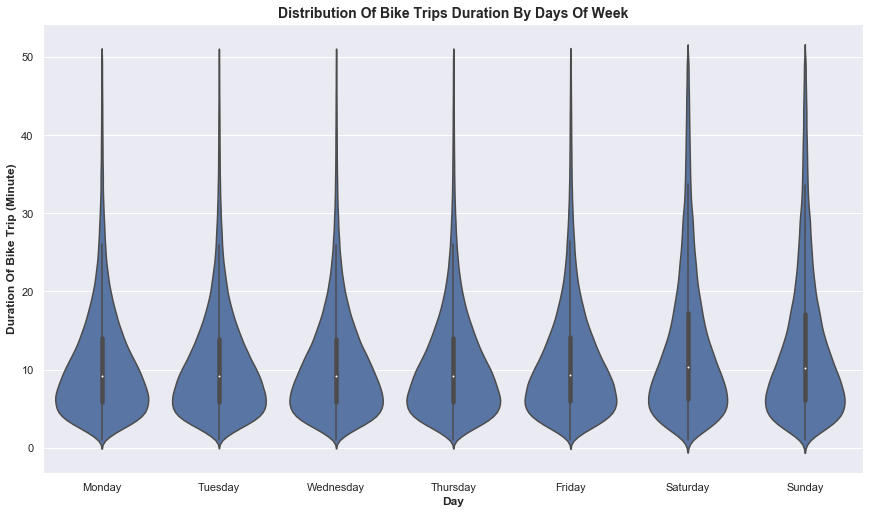

In [504]:
# Scatterplot suitable for two quantitative vars
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[14.70, 8.27])
sns.violinplot(data = df_durationsub, x = 'start_time_weekday', y = 'duration_min',
              color = base_color, order = day_order);
plt.title("Distribution of Bike Trips Duration by Days of Week".title(),
               fontsize = 14, weight = "bold")
plt.xlabel('Day'.title(),
               fontsize = 12, weight = "bold")
plt.ylabel('Duration of Bike Trip (Minute)'.title(),
               fontsize = 12, weight = "bold");

> From Monday to Friday, most of the bike trips take 12 to 13 minutes and rise to 17 minutes during weekends.

### Question 16
*Does a distance of a bike trip correlate with the trip duration ?*

#### Relationship between Duration and Distance of Bike Trip

Next, we want to investigate the relationship between two quantitative variables which are duration and distance. Since the observation is too large, overplotting may occurs. Thus, a random sample will be used only.

In [55]:
df_clean.distance_miles.describe(percentiles = [.99])

count    2.506983e+06
mean     1.347496e+00
std      4.817019e+01
min      0.000000e+00
50%      9.034874e-01
99%      3.169446e+00
max      7.955629e+03
Name: distance_miles, dtype: float64

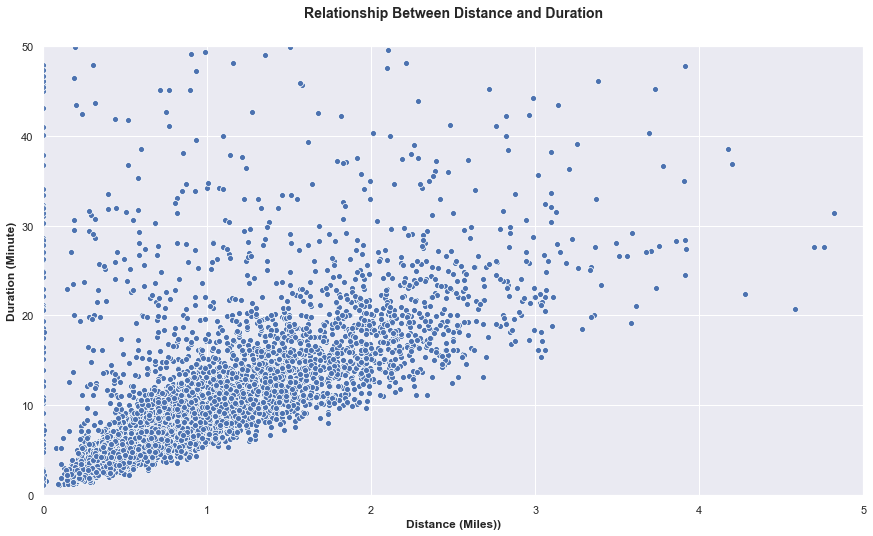

In [680]:
# Scatterplot suitable for two quantitati
plt.figure(figsize=[14.70, 8.27])
sns.scatterplot(data=df_clean.sample(5000), x='distance_miles', y='duration_min')
plt.xlim(0, 5)
plt.ylim(0, 50);
plt.title('Relationship Between Distance and Duration', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Distance (Miles))', fontsize = 12, weight = "bold")
plt.ylabel('Duration (Minute)', fontsize = 12, weight = "bold");

> Overall, they are positively correlated which a longer distance of trip takes much time.

### Question 17
*What is the average distance travelled for different user types ?*

#### Average Distance of Bike Trip for Each User Type

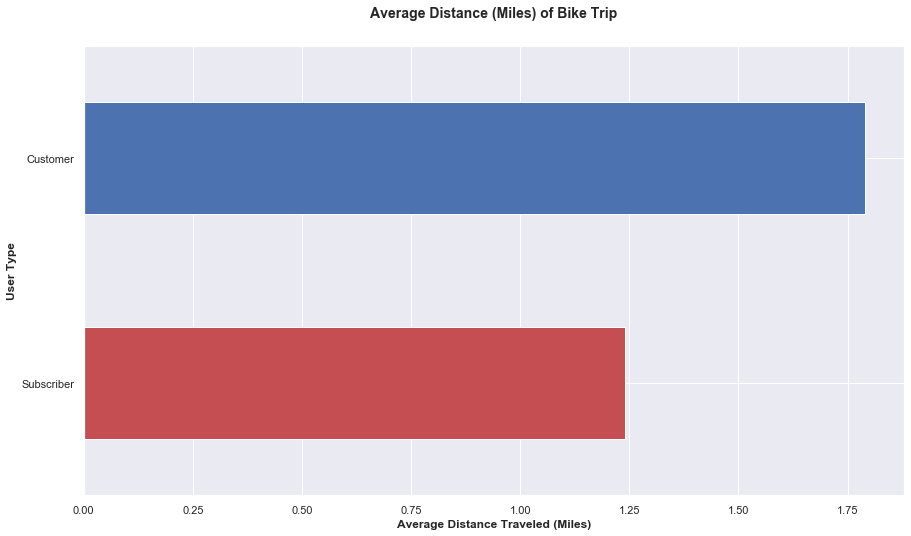

In [681]:
# Customer Usage by Distance vs. Subscriber Usage by Distance
user_dist_mean = df_clean.groupby('user_type')['distance_miles'].mean()
plt.figure(figsize=[14.70, 8.27])
user_dist_mean.plot(kind='barh', color=['r', 'b']);
plt.title('Average Distance (Miles) of Bike Trip', y=1.05, fontsize=14, fontweight='bold')
plt.ylabel('User Type', fontsize = 12, weight = "bold")
plt.xlabel('Average Distance Traveled (Miles)', fontsize = 12, weight = "bold");

> Customers travelled 0.5 miles more than Subscribers in average.

### Question 18
*What is the average bike trip duration for different user types ?*

#### Average Duration of Bike Trip for Each User Type

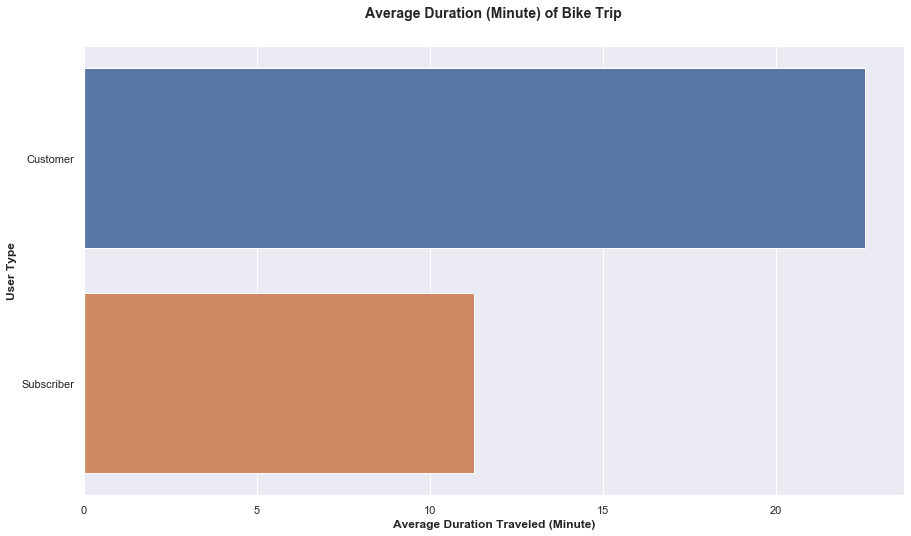

In [682]:
# Customer Usage by Duration vs. Subscriber Usage by Duration
user_duration_mean = df_clean.groupby('user_type')['duration_min'].mean().reset_index()

plt.figure(figsize=[14.70, 8.27])
sns.barplot(data = user_duration_mean, 
            y = 'user_type', 
            x = 'duration_min',
            order = ['Customer', 'Subscriber'])
plt.title('Average Duration (Minute) of Bike Trip', y=1.05, fontsize=14, fontweight='bold')
plt.ylabel('User Type', fontsize = 12, weight = "bold")
plt.xlabel('Average Duration Traveled (Minute)', fontsize = 12, weight = "bold");

> Same to the distance travelled, average duration of bike trip for Customers is double of the Subscribers. This indicates that Customers use the bike longer than Subscribers

### Question 19
*How long for both Customers and Subscribers take the bike ?*

#### Distribution of Bike Trip Duration by User Type

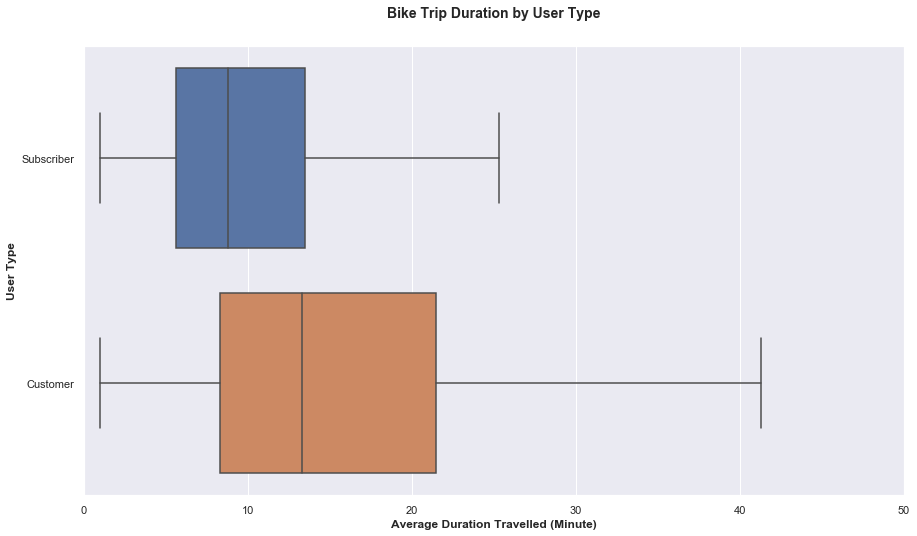

In [683]:
# Distribution of duration
plt.figure(figsize=[14.70, 8.27])
sns.boxplot(data = df_clean, 
            y = 'user_type', 
            x = 'duration_min',
            showfliers = False);
plt.title('Bike Trip Duration by User Type', y=1.05, fontsize=14, fontweight='bold')
plt.ylabel('User Type', fontsize = 12, weight = "bold")
plt.xlabel('Average Duration Travelled (Minute)', fontsize = 12, weight = "bold")
plt.xlim(0, 50);

> This figure shows that customers will use the bike longer compared to subsriber. We can assume most of the subscribers use the bike for a short travel, for work or study while customers is tends to enjoy the bike trip.

### Question 20
*How far for both Customers and Subscribers travelled using bike ?*

#### Distribution of Bike Trip Distance by User Type

In [269]:
# Subset of dataset with distance < 5
df_distancesub = df_clean.loc[df_clean['distance_miles'] <= 5]

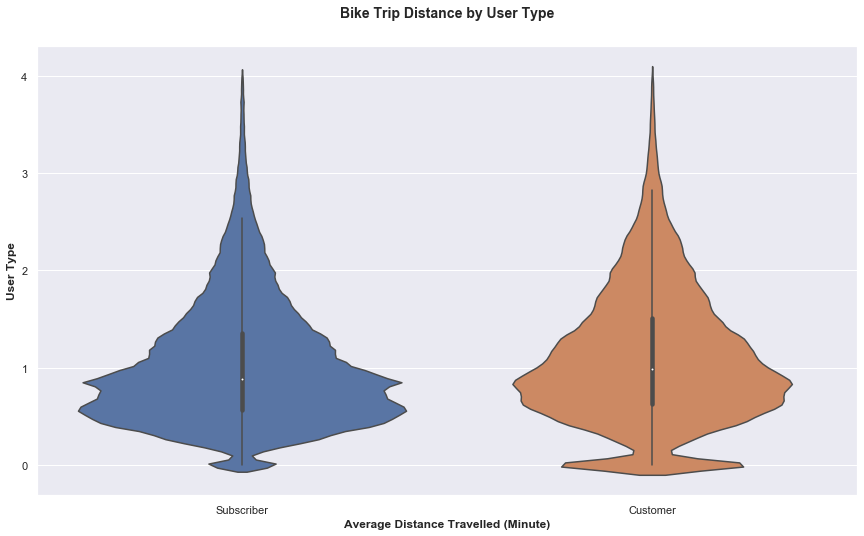

In [684]:
# Distribution of distance
plt.figure(figsize=[14.70, 8.27])
sns.violinplot(data = df_distancesub, 
            x = 'user_type', 
            y = 'distance_miles');
plt.title('Bike Trip Distance by User Type', y=1.05, fontsize=14, fontweight='bold')
plt.ylabel('User Type', fontsize = 12, weight = "bold")
plt.xlabel('Average Distance Travelled (Minute)', fontsize = 12, weight = "bold");

> Subscribers are tend to travel for a short distance only using Bay Wheel. Most of them ride around 0.8 to 1 miles only.

### Question 21
*What is the average trip duration in popular start stations ?*

#### Average Duration of Trip by Start Station

In [311]:
# Subset of trip with station in the 20th most common stations
threshold = station_trip.loc[20].num_of_trips # Frequency of the 20th station 
trip_frequency = df_clean['start_station_id'].value_counts()
idx = np.sum(trip_frequency > threshold)
most_trips = trip_frequency.index[:idx] 
df_clean_sub = df_clean.loc[df_clean['start_station_id'].isin(most_trips)]

In [322]:
df_sub_duration_dist = df_clean_sub.groupby('start_station_id').mean().reset_index()
df_sub_duration_dist

,start_station_id,duration_min,distance_miles
0,003,14.604268,1.474158
1,005,14.413649,1.234246
2,006,17.649904,1.230655
3,015,18.631449,1.182025
4,016,13.696610,1.494684
5,017,12.895745,1.415528
6,021,13.054170,1.452079
7,022,12.393954,1.098343
8,023,12.996181,1.150567
9,027,11.696858,0.975133


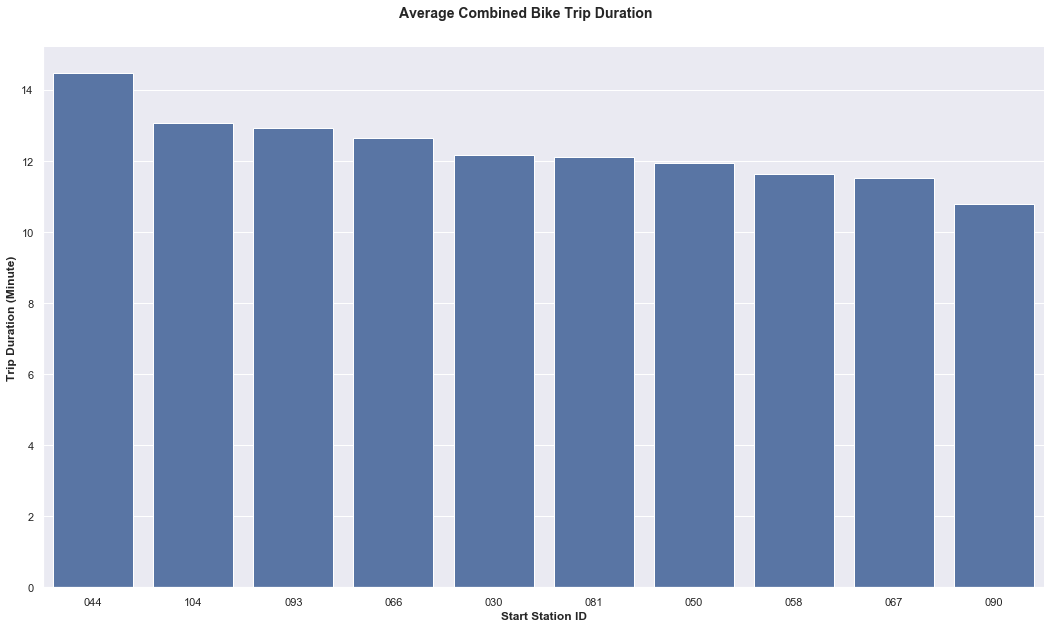

In [685]:
# Avg duration by start station
ax = sns.catplot(data = df_sub_duration_dist, 
                 x = 'start_station_id',
                 y = 'duration_min',
                 kind='bar',
                 color = base_color,
                 order = df_sub_duration_dist.tail(10).sort_values(by = 'duration_min', ascending = False).start_station_id,
                 height = 8.27,  aspect = 14.70/8.27);
ax.set_axis_labels('Start Station ID', 'Trip Duration (Minute)')
ax.set_xlabels(fontsize = 12, weight = "bold")
ax.set_ylabels(fontsize = 12, weight = "bold")
ax.fig.suptitle('Average Combined Bike Trip Duration', y=1.05, fontsize=14, fontweight='bold');

> Station ID 044 has the highest average of trip duration with more than 14 minutes.

### Question 22
*How different users rent the bike ?*

#### Rental Access Method by User Type

In [63]:
df_clean_sub = df_clean.groupby(['user_type', 'rental_access_method']).size().reset_index()
df_clean_sub.rename(columns={0:'num_of_trips'}, inplace=True)
df_clean_sub

,user_type,rental_access_method,num_of_trips
0,Subscriber,app,94531
1,Subscriber,clipper,11810
2,Customer,app,13479
3,Customer,clipper,1018


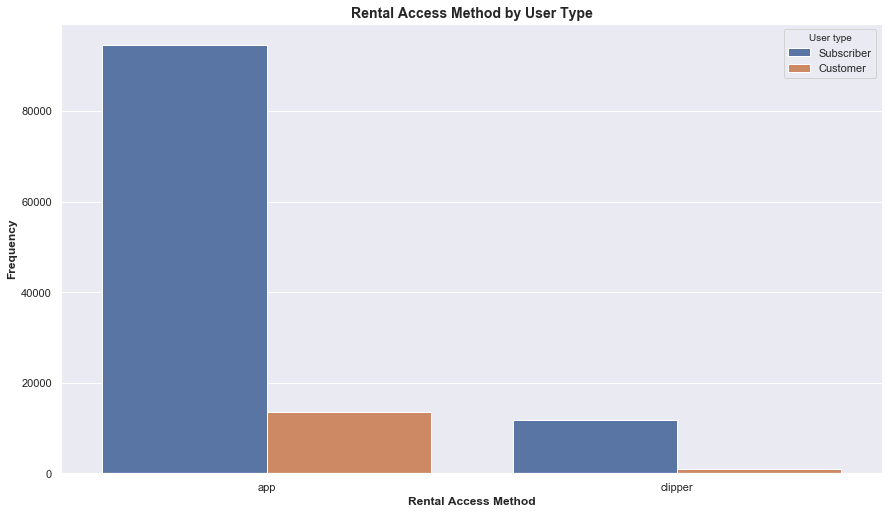

In [686]:
"""
plt.figure(figsize=[14.70, 8.27])
sns.barplot(data = df_clean_sub, x = 'user_type', y = 'num_of_trips', hue = 'rental_access_method')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
"""
plt.figure(figsize=[14.70, 8.27])
sns.countplot(data = df_clean, x = 'rental_access_method', hue = 'user_type');
plt.xlabel('Rental Access Method', fontsize = 12, weight = "bold")
plt.ylabel('Frequency', fontsize = 12, weight = "bold")
plt.title('Rental Access Method by User Type', fontsize=14, fontweight='bold')
plt.legend(title='User type');

> Both Subsribers and Customers prefer to use the app to enjoy the Bay Wheels Service.

<a id='multivar'></a>
## Multivariate Exploration

### Question 23
*How the bike usages trend in different days of week look like across every single month ?*

#### Day of Week Usage in Each Month

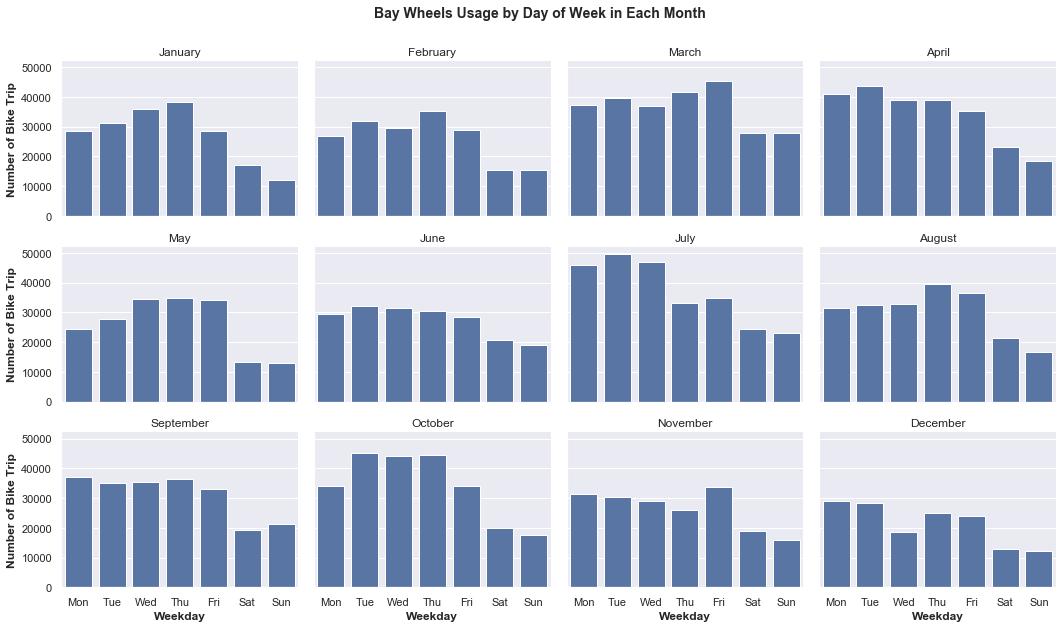

In [687]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
g = sns.FacetGrid(data = df_clean, col = 'start_time_month', col_wrap = 4, height = 8.27/3,  aspect = (14.70/4)/(8.27/3))
g.map(sns.countplot, 'start_time_weekday',  color = base_color, order = day_order)
g.set_titles('{col_name}')
g.set_xlabels('Weekday', fontsize = 12, weight = "bold");
g.set_ylabels('Number of Bike Trip', fontsize = 12, weight = "bold");
g.set(xticklabels=list(calendar.day_abbr))
g.fig.suptitle('Bay Wheels Usage by Day of Week in Each Month', y=1.05, fontsize=14, fontweight='bold')
g.set_xticklabels(rotation=0);

> The trend of every single month is similar where weekdays in every single month are always relatively high usage compared to weekends.

### Question 24
*How the bike usage trend in different session look like in different days of week ?*

#### Bike Usage by  Hour by Day of Week

C:\Users\FORGE-15 I7\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


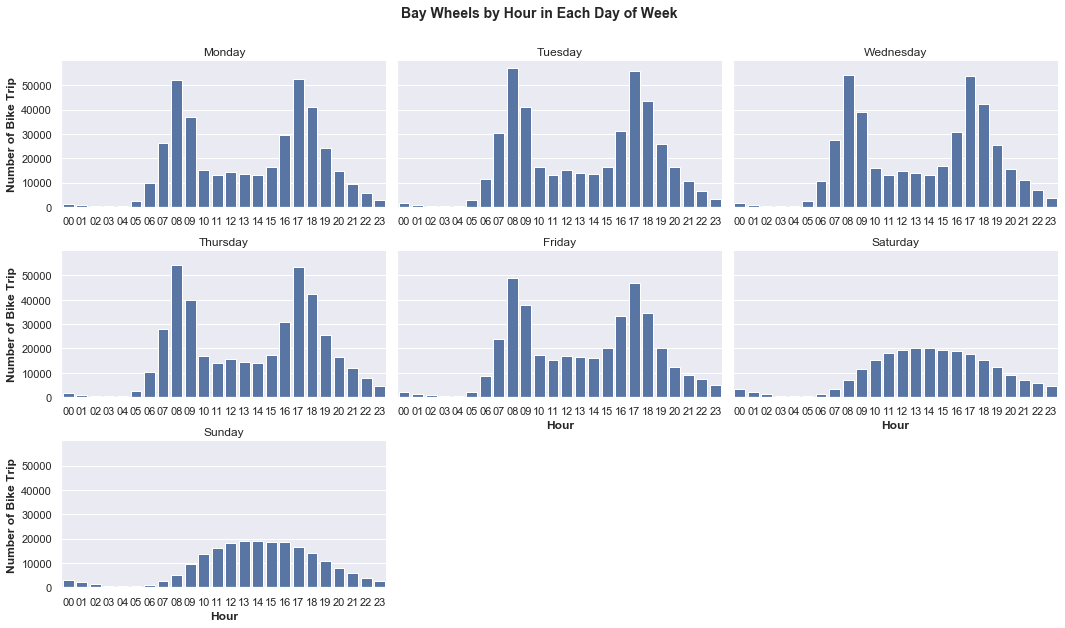

In [688]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayClasses = pd.api.types.CategoricalDtype(ordered = True, categories = day_order)
df_clean['start_time_weekday'] = df_clean['start_time_weekday'].astype(dayClasses)

g = sns.FacetGrid(data = df_clean, col = 'start_time_weekday', col_wrap = 3, height = 8.27/3,  aspect = (14.70/3)/(8.27/3), sharex = False)
g.map(sns.countplot, 'start_time_hour',  color = base_color)
g.set_titles('{col_name}')
g.set_xlabels('Hour', fontsize = 12, weight = "bold");
g.set_ylabels('Number of Bike Trip', fontsize = 12, weight = "bold");
g.fig.suptitle('Bay Wheels by Hour in Each Day of Week', y=1.05, fontsize=14, fontweight='bold');

> We can see the similar trend from Monday to Friday where usage are highly distributed in commute time while usages in Saturday and Sunday are distributed at evening session. We can conclude that most of the user take the bike to travel either to work or study.

### Question 25
*What is the behavior of different users when they are using the bike ?*

#### Relationship Between Distance and Duration by User Type

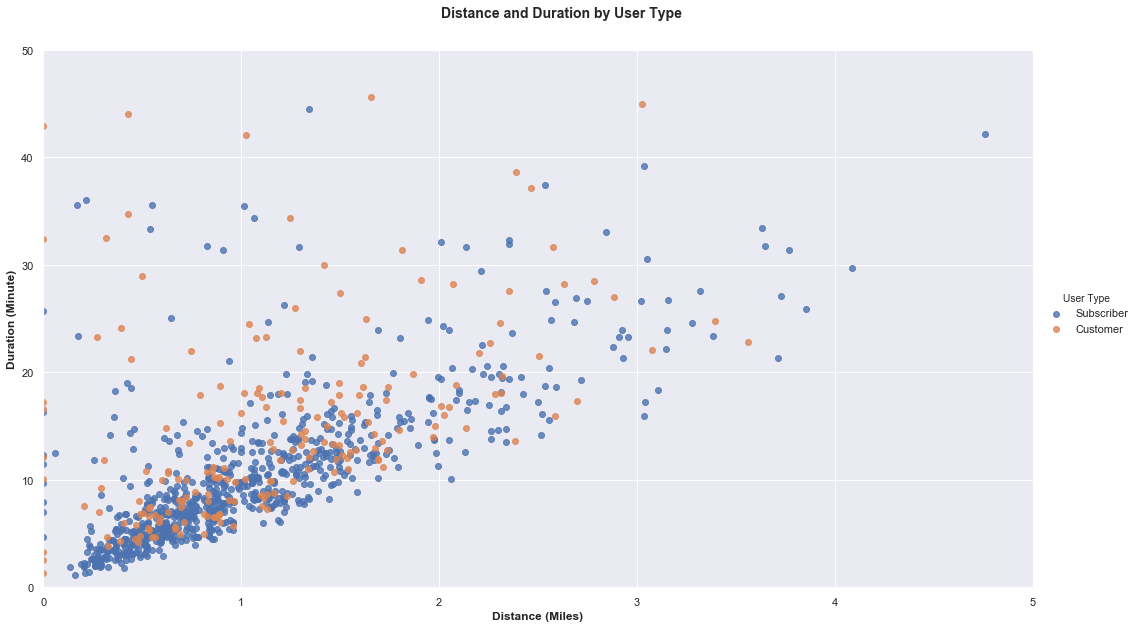

In [703]:
g = sns.FacetGrid(data=df_clean.sample(1000), hue='user_type', height = 8.27,  aspect = 14.70/8.27)
g.map(sns.regplot, 'distance_miles', 'duration_min', fit_reg=False)
g.add_legend(title = 'User Type')
g.fig.suptitle('Distance and Duration by User Type', fontsize = 14, weight = "bold", y=1.05)
g.set_xlabels('Distance (Miles)', fontsize = 12, weight = "bold");
g.set_ylabels('Duration (Minute)', fontsize = 12, weight = "bold");
plt.xlim(0, 5)
plt.ylim(0, 50);

> As an overview, both user type takes longer time if they travelled a long distance. However, in the top left region which indicate short distance with a longer time, the portion of Customers is significally greater than Subscribers. Once again, this suggests that most of the Subsribes use the bike for commute purpose.

### Question 26
*Does bike share services affect the trip duration for different users ?*

#### Duration and Bike Sharing Preference by User Type

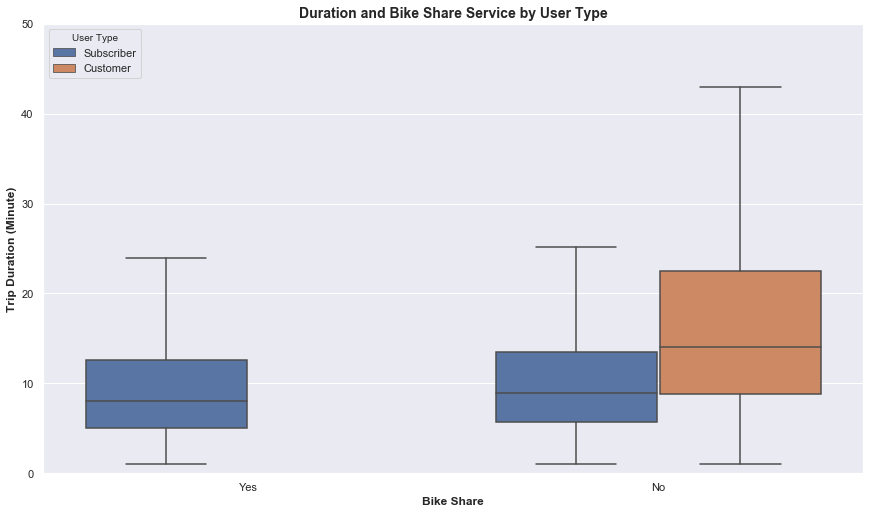

In [694]:
# Use boxplot
plt.figure(figsize=[14.70, 8.27])
sns.boxplot(data = df_clean, x = 'bike_share_for_all_trip', y = 'duration_min', hue = 'user_type', showfliers=False)
plt.title('Duration and Bike Share Service by User Type', fontsize = 14, weight = "bold")
plt.xlabel('Bike Share', fontsize = 12, weight = "bold")
plt.ylabel('Trip Duration (Minute)', fontsize = 12, weight = "bold")
plt.legend(title = 'User Type', loc = 2)
plt.ylim(0, 50);

> Bike share service is only open for Subscribers and seem like it does not really brings the impact to trip duration.

In [406]:
# Group by and rename column (for display in heatmap)
# pivot??
df_clean_sub = df_clean.groupby(['user_type', 'bike_share_for_all_trip']).mean()['duration_min'].reset_index(name = 'duration_mean')
df_clean_sub.rename(columns = {'user_type':'User Type', 'bike_share_for_all_trip':'Bike Sharing'}, inplace = True)
df_clean_sub

,User Type,Bike Sharing,duration_mean
0,Subscriber,Yes,11.827990
1,Subscriber,No,11.109535
2,Customer,Yes,NaN
3,Customer,No,23.962305


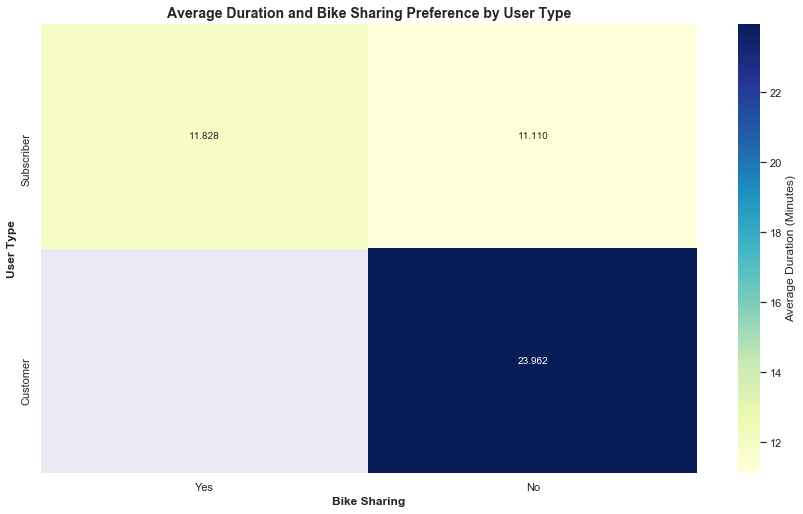

In [706]:
# Use heatmap
cat_means = df_clean.groupby(['user_type', 'bike_share_for_all_trip']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_mean')
cat_means = cat_means.pivot(index = 'user_type', columns = 'bike_share_for_all_trip',
                            values = 'duration_mean')

plt.figure(figsize=[14.70, 8.27])
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Average Duration (Minutes)'},
           cmap="YlGnBu");
plt.xlabel('Bike Sharing', fontsize = 12, weight = "bold")
plt.ylabel('User Type', fontsize = 12, weight = "bold")
plt.title('Average Duration and Bike Sharing Preference by User Type', fontsize = 14, fontweight = 'bold');

### Question 27
*Does the bike usage by day of week throughout all the months similar across different users ?*

#### Duration and Bike Sharing Preference by User Type

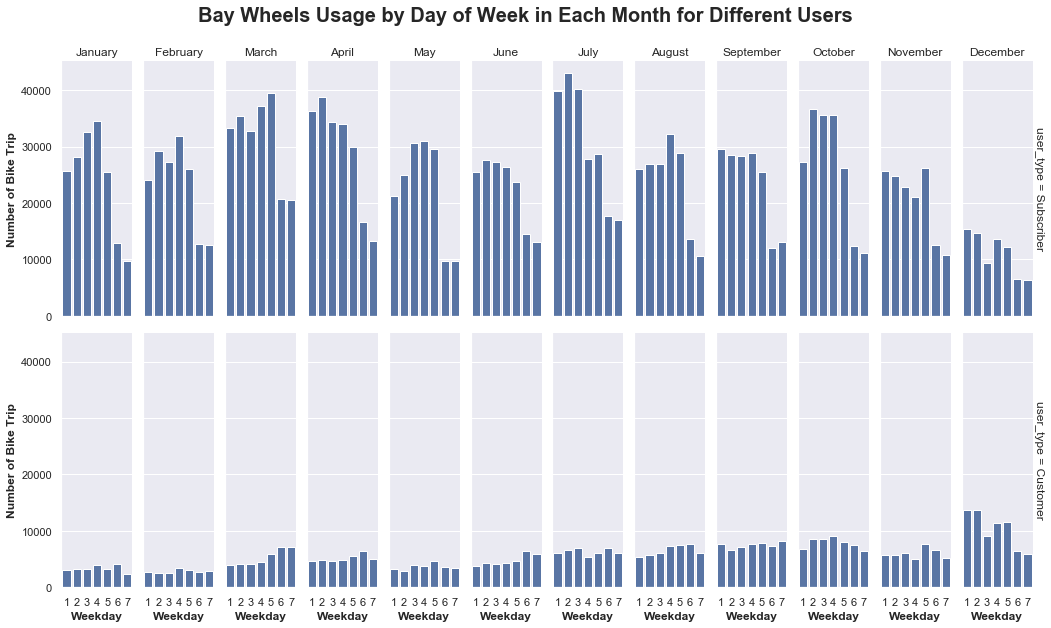

In [704]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
g = sns.FacetGrid(data = df_clean, col = 'start_time_month', row = 'user_type', height = 8.27/2,  aspect = (14.70/12)/(8.27/2), 
                  margin_titles = True)
g.map(sns.countplot, 'start_time_weekday',  color = base_color, order = day_order)
g.set_titles(row_template = '', col_template = '{col_name}')
g.set_xlabels('Weekday', fontsize = 12, weight = "bold");
g.set_ylabels('Number of Bike Trip', fontsize = 12, weight = "bold");
g.fig.suptitle('Bay Wheels Usage by Day of Week in Each Month for Different Users', y=1.05, fontsize=20, fontweight='bold')
g.set(xticklabels=['1', '2', '3', '4', '5', '6', '7'])
plt.tight_layout();

> From the visualization above, we can see the difference of usage by day of week is not significant in Customers. We can conclude again most of the Subcribers take the bike to work and study so the weekdays usage is always higher while well distributed shape found in frequency of bike usage in Customer suggest that they are using Bay Wheels service for different purposes

<a id='conclusion'></a>
## Conclusion

Renting a bike from Bay Wheels is a fantastic (healthy and environmentally friendly) way of moving around in the city, both for enjoyment and work. There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around lunch time. Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.